<a href="https://colab.research.google.com/github/fernando12170209/Machine_learning_basico/blob/master/RedNeuronaldesdeCero/RedNeuronaldesdeCero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=W8AeOXa_FqU&list=PL-Ogd76BhmcCO4VeOlIH93BMT5A_kKAXp&index=5&t=1052s


In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

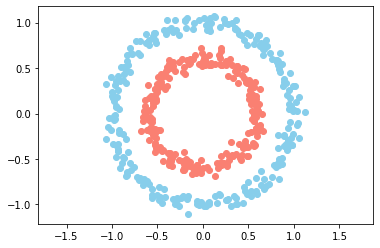

In [47]:
#Crear Dataset
n=500 #numero de muetsras
p=2 #numero de parametros

#factor distancia entre circulos 
X, Y=make_circles(n_samples=n,factor=0.6, noise=0.05)
#Y vector binario, las clases del circulo

Y=Y[:,np.newaxis]
#plt.scatter(X[:,0],X[:,1])
plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1],c="skyblue")
plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],c="salmon")
plt.axis("equal")
plt.show()

In [4]:
#Objetivo:Separar en dos clases
class neural_layer():
  def __init__(self,n_conn,n_neur,act_f):
    self.act_f=act_f
    self.b=np.random.rand(1,n_neur)*2-1
    self.W=np.random.rand(n_conn,n_neur)*2-1


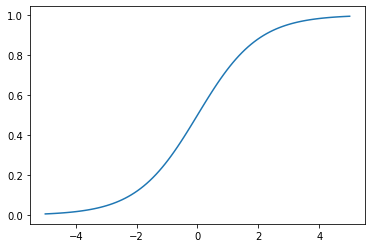

In [5]:
#FuncionES de activacion   Sigma[0] : funcion sigma Sigma[1]: funcion sigma derivada
sigm=(lambda x:1/(1+np.e**(-x)),
      lambda x:x*(1-x))

relu=lambda x:np.maximum(0,x)
_X=np.linspace(-5,5,100)
plt.plot(_X,sigm[0](_X))
#plt.plot(_X,sigm[1](_X))

In [6]:
l0=neural_layer(p,4,sigm)
l1=neural_layer(4,8,sigm)
#...
#Creacion de modelo de datos de RED NEURONAL en funcion a la topologia(numero de neuronas por capa) y funcion de activacion
def create_nn(topology,act_f):
  nn=[]
  #Descartar ultimo valor [:-1]
  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l],topology[l+1],act_f))
  return nn


In [69]:
#Entrenar la red
#topology=[p,4,8,16,8,4,1]
topology=[p,4,8,1]
neural_net=create_nn(topology,sigm)

l2_cost=(lambda Yp, Yr:np.mean((Yp-Yr)**2),
         lambda Yp, Yr: (Yp-Yr))

def train(neural_net,X,Y,l2_cost,lr=0.5, train=True):
  #out:devuelve la suma podnerada y activacion de la capa anterior
  #out[-1][]:ultimo output que hallamos introdcido en nuestro vector de salida
  #out[][1] la activacion
  out=[(None,X)]
  #Forward pass
  for l,layer in enumerate(neural_net):
    #indice l para recorrer para recorrer las capas
    #suma ponderada
    z=out[-1][1]@neural_net[l].W+neural_net[l].b
    #activacion(salida de la capa #)
    a=neural_net[l].act_f[0](z)

    out.append((z,a))
  #print(out[-1][1])
  #Salida de error de calculado en funcion a la salida con Y
  #print(l2_cost[0](out[-1][1],Y))
  if train:
    #Backward pass
    deltas=[]
    for l in reversed(range(0,len(neural_net))):
      z=out[l+1][0]
      a=out[l+1][1]
      #print(a.shape)
     

      if l==len(neural_net)-1:
        #Calcular delta ultima capa, error de la ultima capa respecto al coste
        #insert agrega al principio
        deltas.insert(0,l2_cost[1](a,Y)*neural_net[l].act_f[1](a))
      else :
        #calcular delta respecto a capa previa
        deltas.insert(0,deltas[0] @ _W.T *neural_net[l].act_f[1](a))
      
      _W = neural_net[l].W
      #Gradient descent
      neural_net[l].b=neural_net[l].b - np.mean(deltas[0],axis=0,keepdims=True)*lr
      neural_net[l].W=neural_net[l].W - out[l][1].T@deltas[0]*lr
  return out[-1][1]

train(neural_net,X,Y,l2_cost,0.5)



array([[0.15871575],
       [0.15923671],
       [0.15493977],
       [0.15711694],
       [0.15458078],
       [0.15550912],
       [0.15982537],
       [0.16100632],
       [0.15461344],
       [0.15516483],
       [0.15997504],
       [0.16220317],
       [0.15876194],
       [0.15276164],
       [0.16014948],
       [0.15557373],
       [0.15973638],
       [0.15329341],
       [0.15911459],
       [0.15443754],
       [0.15327691],
       [0.15368483],
       [0.1507687 ],
       [0.15191243],
       [0.15788731],
       [0.15220594],
       [0.15527143],
       [0.1531777 ],
       [0.15704502],
       [0.16123401],
       [0.15822399],
       [0.15135499],
       [0.16172786],
       [0.15476539],
       [0.15987465],
       [0.15938882],
       [0.15641231],
       [0.15188728],
       [0.15468734],
       [0.16179416],
       [0.15970858],
       [0.15280272],
       [0.15405861],
       [0.15478603],
       [0.15953278],
       [0.15562785],
       [0.15315333],
       [0.154

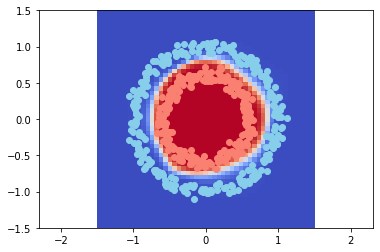

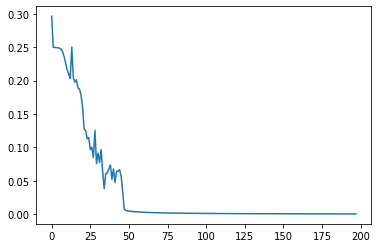

In [ ]:
import time
from IPython.display import clear_output

neural_n=create_nn(topology,sigm)

loss=[]

for i in range(9000):
  #Entrenemos la reds
  pY=train(neural_n,X,Y,l2_cost,lr=0.05)

  if i%25==0:
    loss.append(l2_cost[0](pY,Y))

    res=50

    _x0=np.linspace(-1.5,1.5,res)
    _x1=np.linspace(-1.5,1.5,res)

    _Y=np.zeros((res,res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        #prediccion False
        #print(train(neural_n,np.array([[x0,x1]]),Y,l2_cost,train=False)[0][0])
        _Y[i0,i1]=train(neural_n,np.array([[x0,x1]]),Y,l2_cost,train=False)[0][0]
    plt.pcolormesh(_x0,_x1,_Y,cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1],c="skyblue")
    plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)),loss)
    plt.show()

    time.sleep(0.5)